1. Загрузить и визуализировать кривые ГИС из las-файла.

In [3]:
import lasio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
las = lasio.read('well1.las')

In [5]:
well = las.df()
well.reset_index(inplace=True)
well = well.rename(columns={'DEPT': 'DEPTH'})

In [6]:
well

,DEPTH,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
0,3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
1,3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
2,3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3,3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
4,3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
5817,4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
5818,4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN
5819,4231.9,NaN,18.22,NaN,197.66,NaN,NaN,NaN,NaN,7.031,NaN,8.980,NaN,207.437,NaN


In [7]:
well.describe()

,DEPTH,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
count,5821.000000,1998.000000,1961.000000,3794.000000,2021.000000,3795.000000,3722.000000,1967.000000,3456.000000,2601.000000,3542.000000,2579.000000,3506.000000,1961.000000,3750.000000
mean,3941.000000,273.483976,17.419546,18.486294,195.155576,242.322893,223.945698,2.597788,2.586497,7.164417,6.794874,6.058835,6.905066,201.113277,261.112814
std,168.052229,28.066169,17.848643,19.965148,5.474843,8.118107,18.821121,0.115784,0.110085,3.316917,1.802649,2.370130,2.022742,10.271922,33.703962
min,3650.000000,204.702000,0.060000,0.200000,174.620000,219.470000,144.672000,1.836000,2.030000,2.734000,2.776000,2.279000,2.957000,187.600000,186.333000
25%,3795.500000,248.068000,8.250000,9.662500,192.650000,240.965000,218.661500,2.533000,2.538000,4.924000,5.511000,4.580000,5.578500,194.375000,244.916750
50%,3941.000000,271.425500,15.380000,14.845000,196.470000,243.480000,227.533000,2.609000,2.600000,6.617000,6.449000,5.129000,6.562500,200.594000,258.981000
75%,4086.500000,297.836250,19.840000,22.837500,198.190000,245.970000,234.252500,2.677500,2.656000,7.626000,7.897000,6.850000,7.879750,205.848000,282.249250
max,4232.000000,338.484000,150.330000,321.860000,237.760000,300.420000,280.673000,2.897000,2.931000,22.618000,14.811000,17.960000,18.672000,275.157000,339.243000


In [8]:
def visialize_not_merged_logs():
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 15), sharey=True)

    curve_names = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
    curve_names_cont = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1','DT_1', 'DS_2']
    colors = ["red", "green", "blue", "black", "pink", "purple", "darkgreen"]
    scale = [(185, 340), (0, 23), (0, 100), (2, 3), (2, 15), (114, 338), (140, 280)] # (min, max)  

    # Строим графики
    for i, ax in enumerate(axes.flatten()):
        ax.plot(well[curve_names[i]], well["DEPTH"], color=colors[i], lw=0.5, label=f"{curve_names[i]}")

        # Добавляем дополнительные кривые, если они есть в curve_names_cont
        if i < len(curve_names_cont):  # Проверяем, существует ли curve_names_cont[i]
            ax.plot(well[curve_names_cont[i]], well["DEPTH"], color="cyan", lw=0.5, label=f"{curve_names_cont[i]}")
            ax.legend(loc="upper right", fontsize=8)
        
        ax.set_xlim(scale[i][0], scale[i][1])

        ax.spines['top'].set_edgecolor(colors[i])
        ax.set_xlabel(curve_names[i])  

        ax.set_ylim(4235, 3650)  # Инвертируем ось глубины
        ax.set_yticks(np.arange(3650, 4235, 10))
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.grid()

    # Убираем подписи оси Y у всех, кроме первого графика
    for ax in axes[1:]:
        plt.setp(ax.get_yticklabels(), visible=False)

    # Уменьшаем расстояние между графиками
    fig.subplots_adjust(wspace=0.05)

    plt.show()


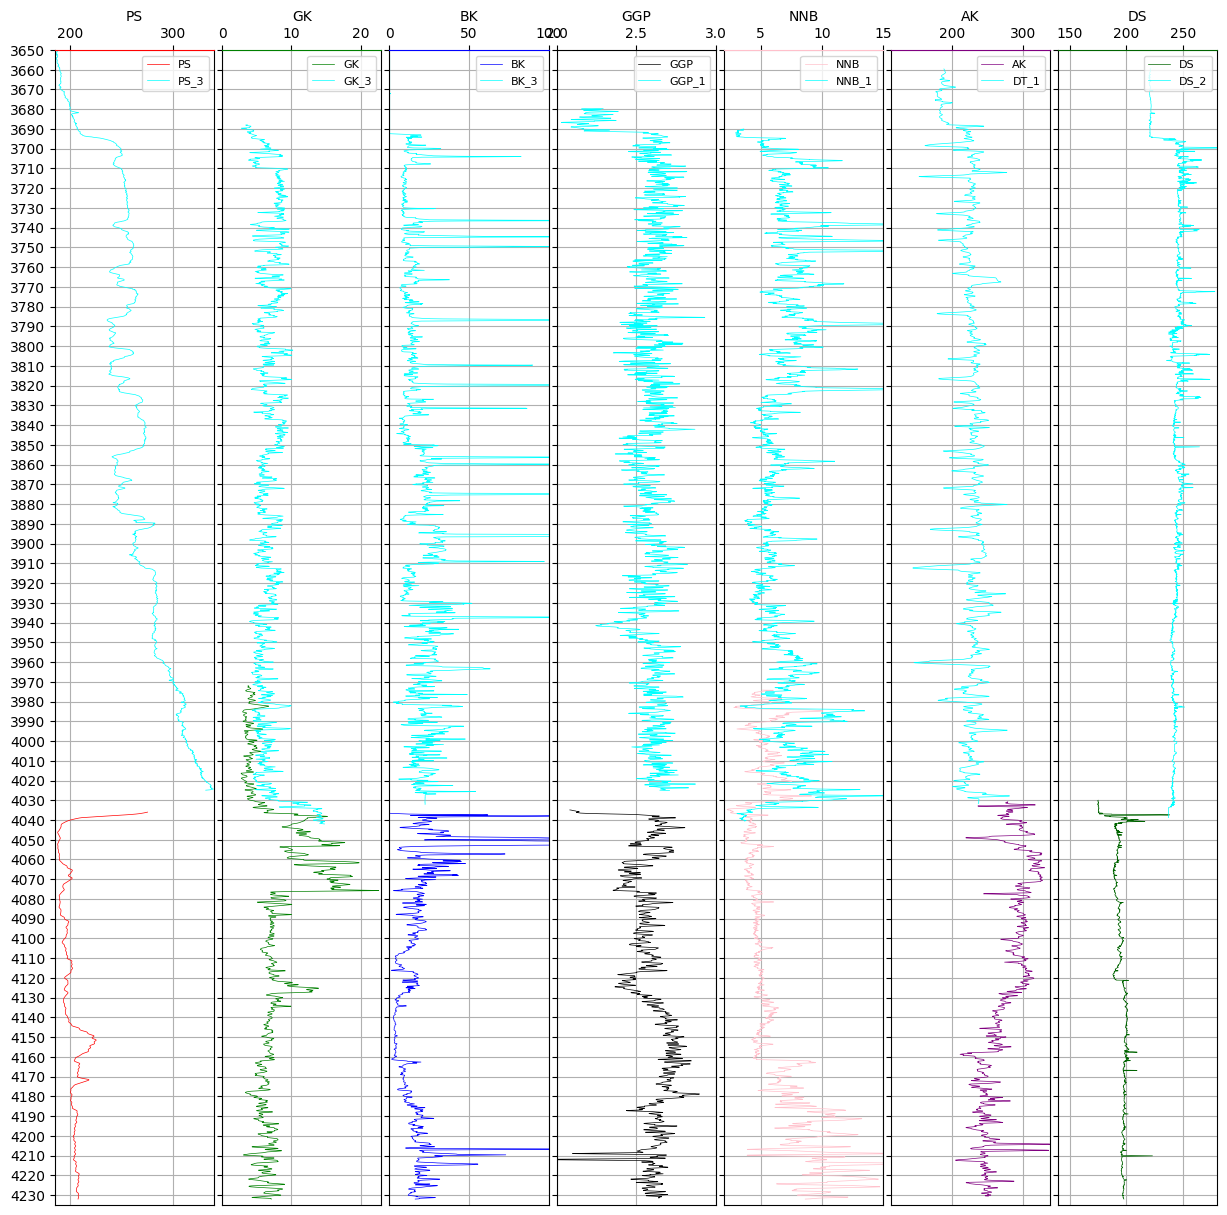

In [9]:
visialize_not_merged_logs()

Визуализировали данные. Что мы здесь видим?
1) у кривых БК, ГГК, ДС, АК нужно обрезать хвосты
2) пропуски (после удаления хвостов) у кривых БК, ГГК, ДС, АК нужно заполнить интерполяцией
2) кусочки кривых ГК, ННК, АК и ДС необходимо подвинуть друг к другу. 


Обрезка хвостов у кривых 

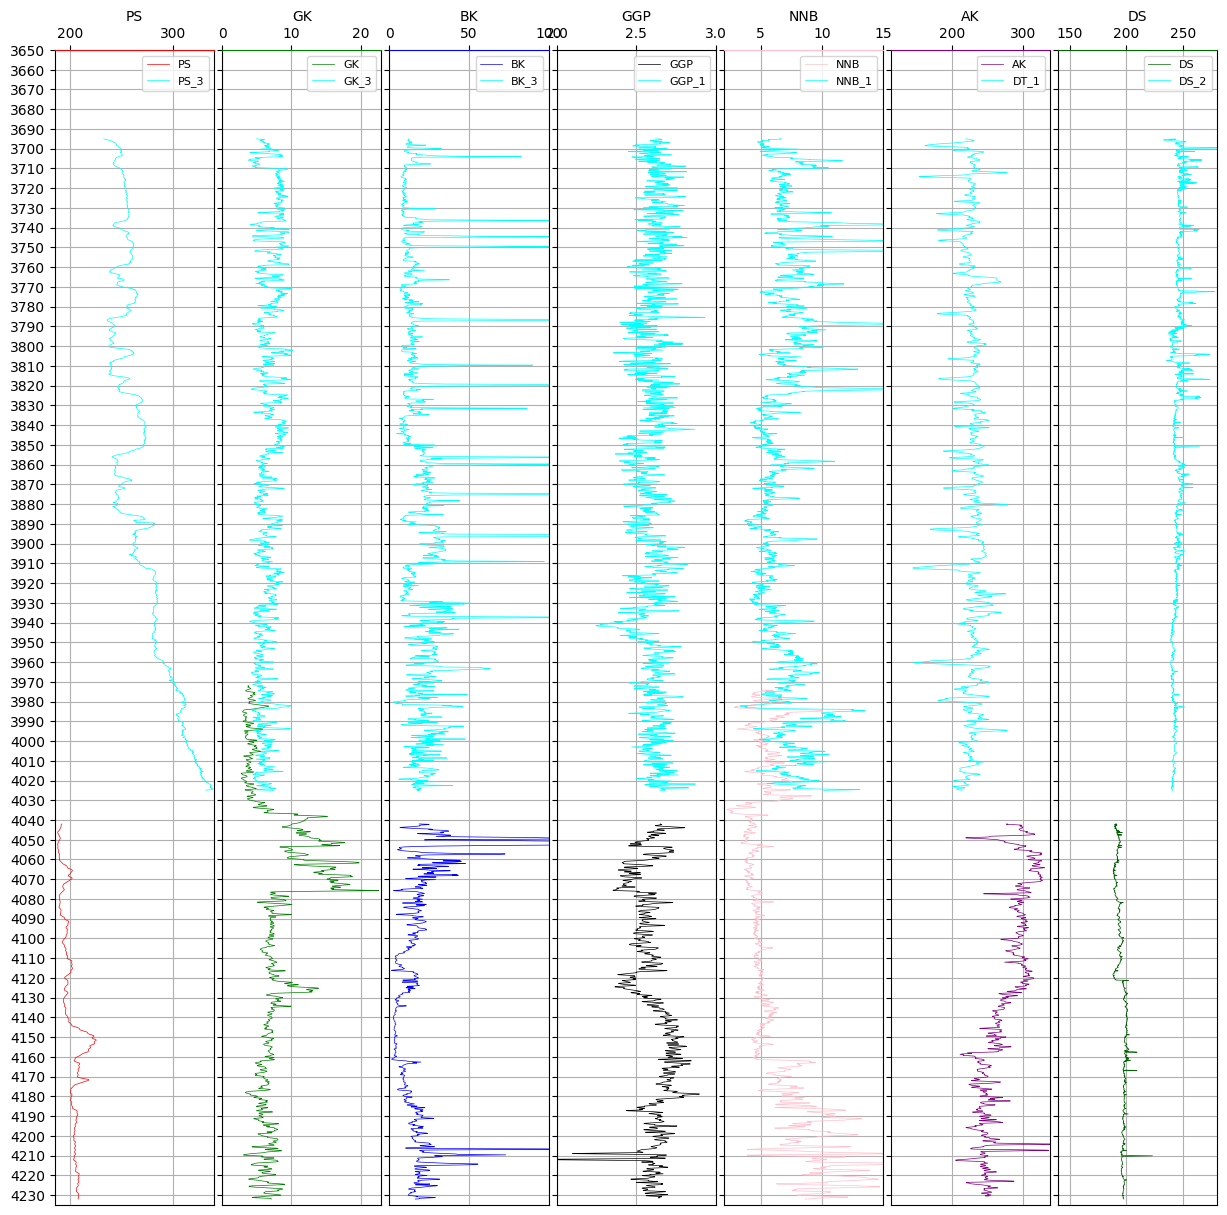

In [10]:
upper_logs_to_clean = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DS_2', 'DT_1'] #обрезка хвостов сверху и снизу у всех светлоголубых кривых
well.loc[(well["DEPTH"] > 4025) | (well["DEPTH"] < 3695), upper_logs_to_clean] = np.nan

lower_logs_to_clean = ['PS', 'BK', 'GGP', 'AK', 'DS'] #обрезка хвостов сверху у нижних разноцветных кривых
well.loc[(well["DEPTH"] < 4042), lower_logs_to_clean] = np.nan

visialize_not_merged_logs()

Подвинем кривые до их совпадения в их зоне перекрытия

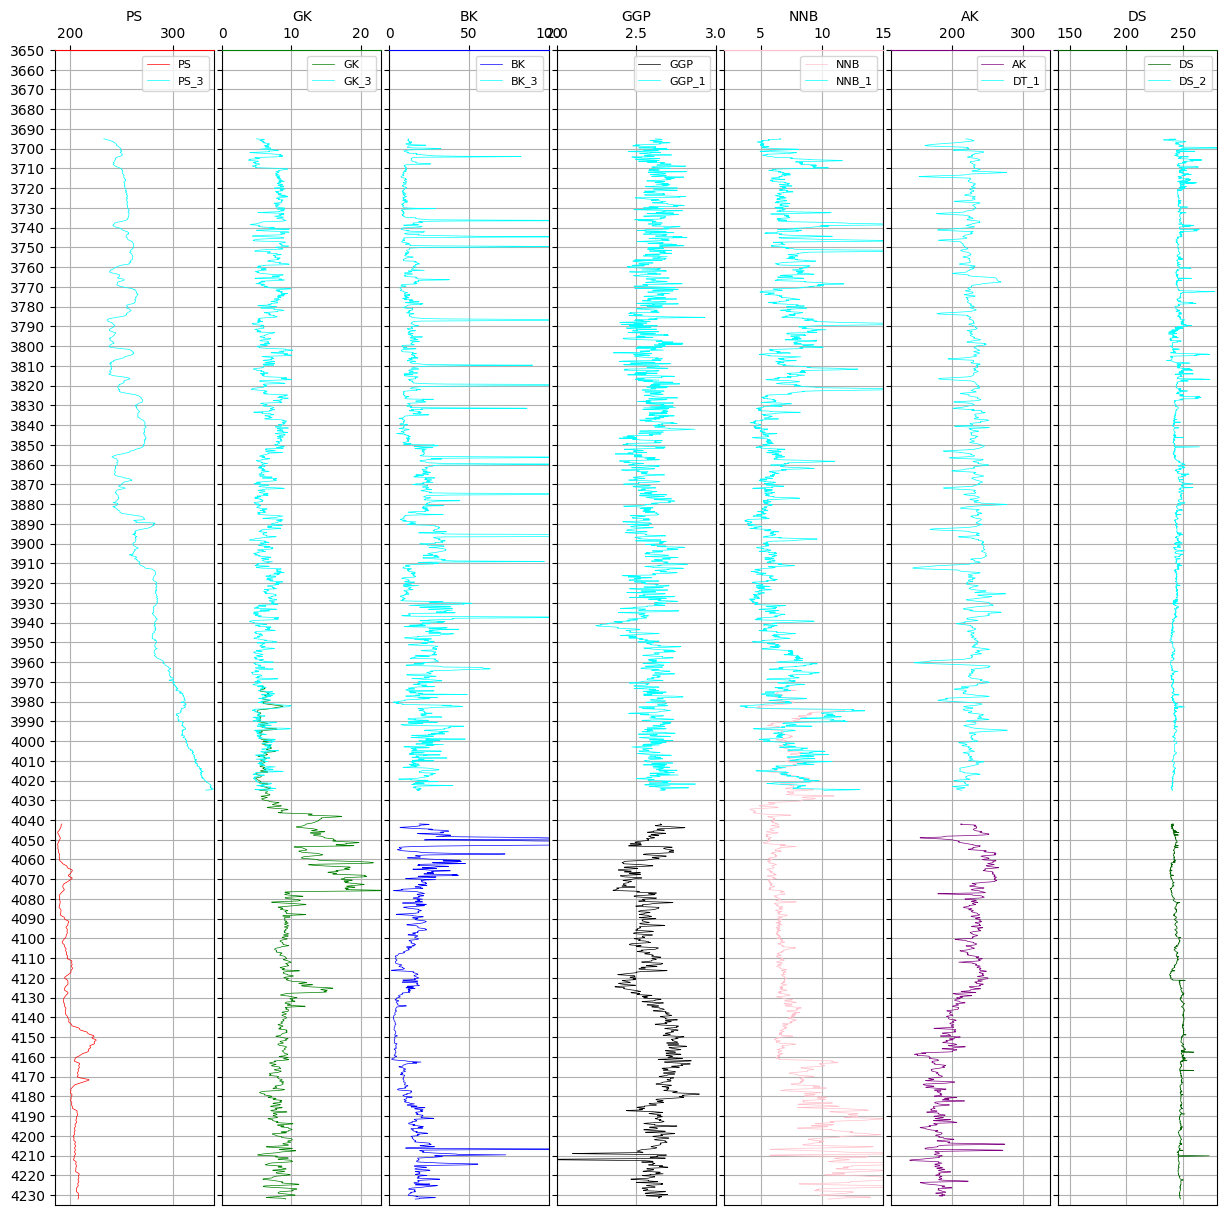

In [11]:
curves_to_move = [('GK', 'GK_3'), ('NNB', 'NNB_1'), ('AK', 'DT_1'), ('DS', 'DS_2')]

for i, j in curves_to_move:

    if len(well[i].dropna()) > len(well[j].dropna()):
        longest_curve, shortest_curve = i, j
    else:
        longest_curve, shortest_curve = j, i


    if well[i].first_valid_index() > well[j].last_valid_index(): #случай без перекрытия кривых
        gap = well[longest_curve].dropna().iloc[-1] - well[shortest_curve].dropna().iloc[0]
        
    else: #перекрытие есть
        ind = well[shortest_curve].first_valid_index()
        gap = well[longest_curve][ind] - well[shortest_curve][ind]
    
    well[shortest_curve] += gap


visialize_not_merged_logs()


Кривые подвинуты, теперь осталось их сшить. Для кривых, где есть перекрытие, будем отдвать предпочтение самой длинной кривой, где перекрытия нет - будем интерполировать 

In [12]:
for i, j in [('GK', 'GK_3'), ('NNB', 'NNB_1'), ('AK', 'DT_1'), ('DS', 'DS_2'), ('BK', 'BK_3'), ('GGP', 'GGP_1')]:
    name = f'Merged_{i}'

    if len(well[i].dropna()) > len(well[j].dropna()):
        longest_curve, shortest_curve = i, j
    else:
        longest_curve, shortest_curve = j, i

    if well[i].first_valid_index() > well[j].last_valid_index():
        well[name] = well[longest_curve].combine_first(well[shortest_curve]).interpolate()
    else:
        well[name] = well[longest_curve].combine_first(well[shortest_curve])


In [13]:
def visialize_merged_logs():
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 15), sharey=True)

    """curve_names = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
    curve_names_cont = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1','DT_1', 'DS_2']
    colors = ["red", "green", "blue", "black", "pink", "purple", "darkgreen"]
    scale = [(185, 340), (0, 23), (0, 100), (2, 3), (2, 15), (114, 338), (140, 280)] # (min, max)  """

    curve_names = ['Merged_GK', 'Merged_BK', 'Merged_GGP', 'Merged_NNB', 'Merged_AK', 'Merged_DS']
    colors = ["black", "blue", "green", "magenta", "red", "purple", "darkgreen"]
    scale = [(0, 23), (0, 100), (2, 3), (2, 15), (114, 338), (200, 280)] 

    
    for i, ax in enumerate(axes.flatten()):
        ax.plot(well[curve_names[i]], well["DEPTH"], color=colors[i], lw=0.5, label=f"{curve_names[i]}")
        
        ax.set_xlim(scale[i][0], scale[i][1])

        ax.spines['top'].set_edgecolor(colors[i])
        ax.set_xlabel(curve_names[i])  

        ax.set_ylim(4235, 3650)  
        ax.set_yticks(np.arange(3650, 4235, 10))
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.grid()

   
    for ax in axes[1:]:
        plt.setp(ax.get_yticklabels(), visible=False)

   
    fig.subplots_adjust(wspace=0.05)

    plt.show()


IndexError: list index out of range

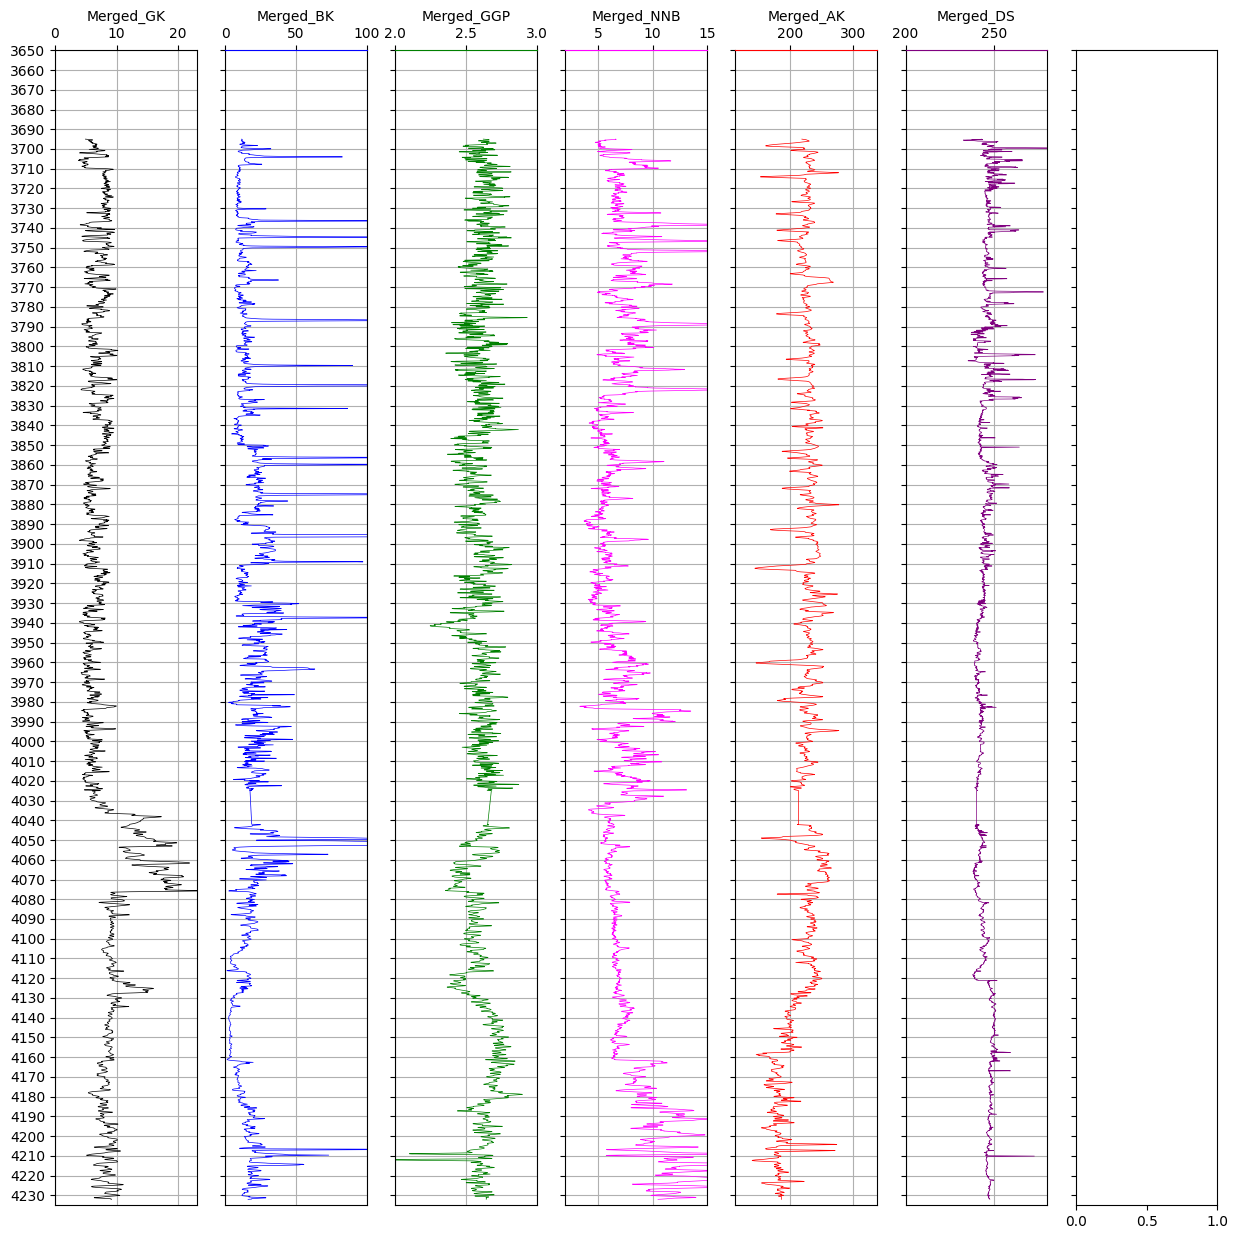

In [14]:
visialize_merged_logs()

Увяжем ГК и ГГК


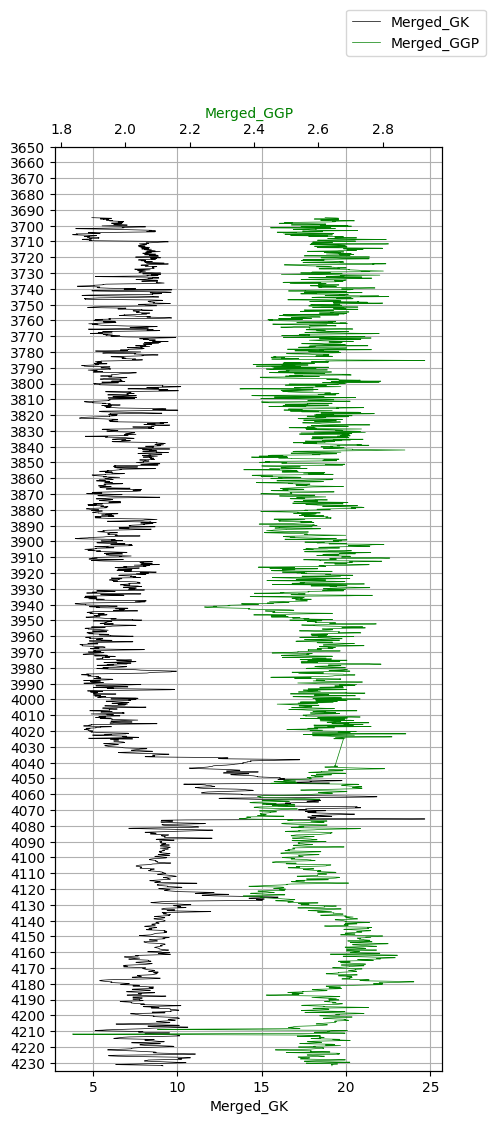

In [ ]:

fig, ax1 = plt.subplots(figsize=(5, 12))


ax1.plot(well['Merged_GK'], well['DEPTH'], 'k', lw=0.5,  label='Merged_GK')
ax1.set_xlabel('Merged_GK', color='black')
ax1.set_ylim(4235, 3650)  
ax1.set_yticks(np.arange(3650, 4235, 10))
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("bottom")
ax1.grid()

ax3 = ax1.twiny()
ax3.plot(well['Merged_GGP'], well['DEPTH'], 'g',lw=0.5,  label='Merged_GGP')
ax3.set_xlabel('Merged_GGP', color='green')
ax3.set_ylim(4235, 3650)  

ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")

fig.legend(loc="upper right", bbox_to_anchor=(1, 1))

plt.show()


Видим небольшое расхождение между кривыми. Сместим ГГК вниз

In [ ]:
well['GGK_DEPTH'] = well['DEPTH'] + 3

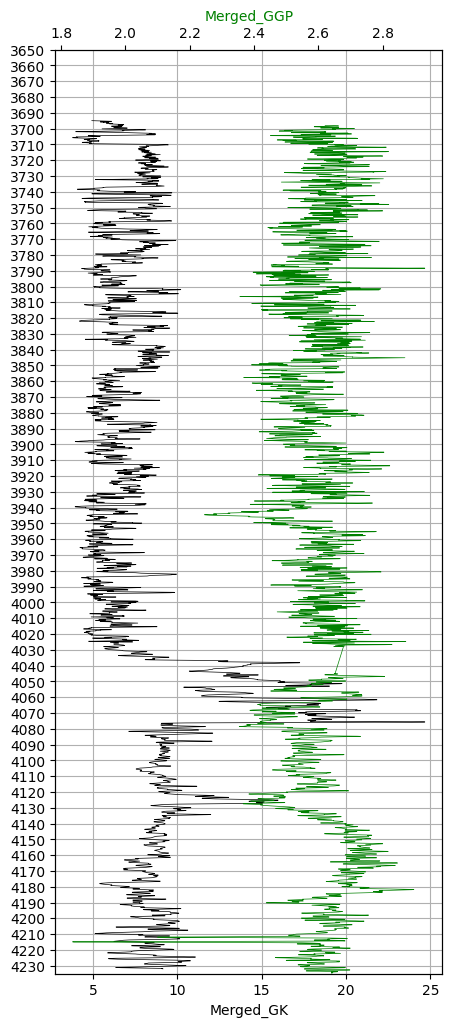

In [ ]:

fig, ax1 = plt.subplots(figsize=(5, 12))

# Первая кривая (черная)
ax1.plot(well['Merged_GK'], well['DEPTH'], 'k', lw=0.5,  label='Merged_GK')
ax1.set_xlabel('Merged_GK', color='black')
ax1.set_ylim(4235, 3650)  # Инвертируем ось глубины
ax1.set_yticks(np.arange(3650, 4235, 10))
ax1.xaxis.set_ticks_position("bottom")
ax1.xaxis.set_label_position("bottom")
ax1.grid()

# Вторая ось (зеленая)
ax3 = ax1.twiny()
ax3.plot(well['Merged_GGP'], well['GGK_DEPTH'], 'g',lw=0.5,  label='Merged_GGP')
ax3.set_xlabel('Merged_GGP', color='green')
ax3.set_ylim(4235, 3650)  # Инвертируем ось глубины

ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")


plt.show()


Рассчитаем двойной разностный потенциал ГК – дГК


Минимальное среднее для глубин 3960-3970
Максимальное среднее для глубин 4060-4080

In [16]:
mean_min = well.loc[((well["DEPTH"] > 3960) & (well["DEPTH"] < 3970)), 'Merged_GK'].mean()
mean_max = well.loc[((well["DEPTH"] > 4060) & (well["DEPTH"] < 4080)), 'Merged_GK'].mean()
mean_min, mean_max

(np.float64(5.378676767676767), np.float64(16.40769849246231))

In [22]:
well['DGK'] = (well['Merged_GK'] - mean_min) / (mean_max - mean_min)
well.loc[well["DGK"] < 0, 'DGK'] = 0
well.loc[well["DGK"] > 1, 'DGK'] = 1

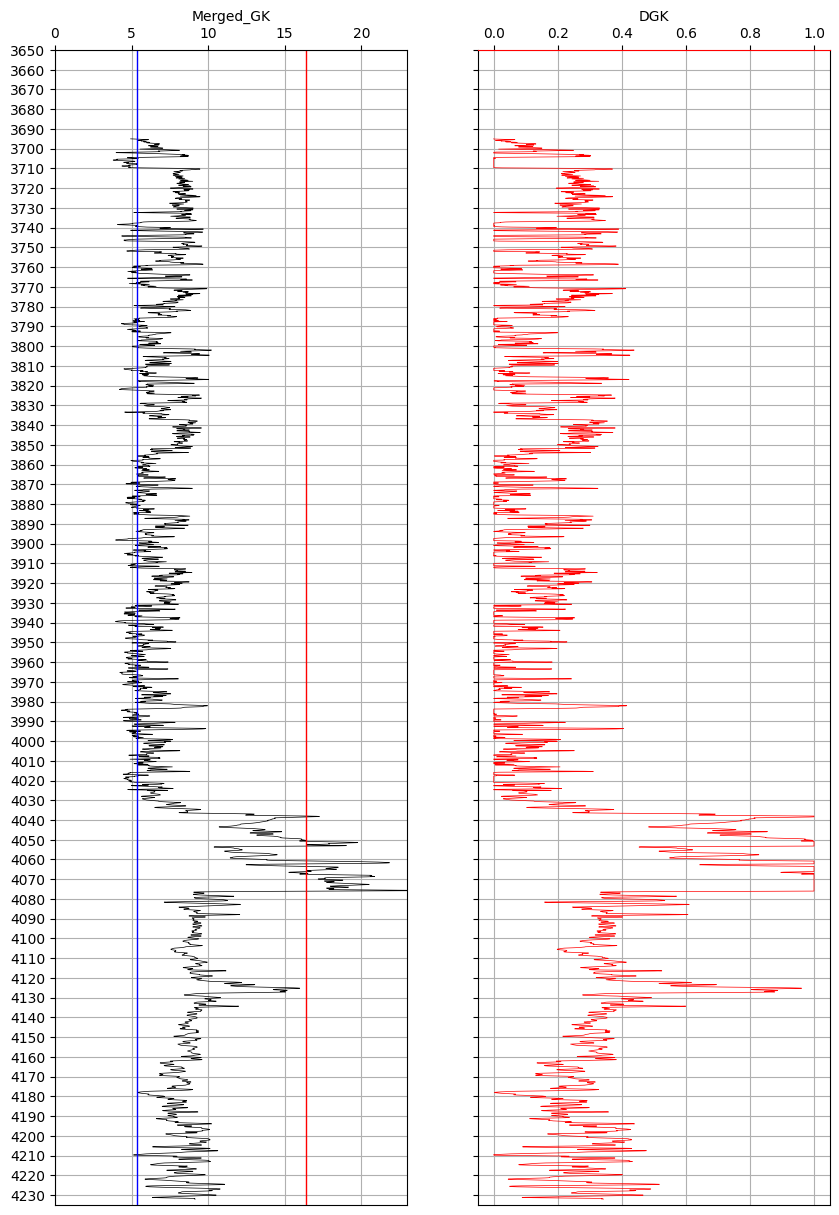

In [23]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(10, 15))

axes[0].plot(well['Merged_GK'], well['DEPTH'], 'black', lw=0.5, label='Merged_GK')
axes[0].axvline(x=mean_min, color='b', lw=1, label='X = 7')
axes[0].axvline(x=mean_max, color='r', lw=1)
axes[0].set_xlim(0, 23)
axes[0].set_ylim(4235, 3650)
axes[0].spines['top'].set_edgecolor('black')
axes[0].set_xlabel('Merged_GK')
axes[0].set_yticks(np.arange(3650, 4235, 10))
axes[0].xaxis.set_ticks_position("top")
axes[0].xaxis.set_label_position("top")
axes[0].grid()

axes[1].plot(well['DGK'], well['DEPTH'], 'r', lw=0.5)
axes[1].set_ylim(4235, 3650) 
axes[1].spines['top'].set_edgecolor('r')
axes[1].set_xlabel('DGK')
axes[1].xaxis.set_ticks_position("top")
axes[1].xaxis.set_label_position("top")
axes[1].grid()  
plt.show()    